# 🌸 IRIS Flower Classification
### Predict the species of a flower using its measurements
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##  **Load Data**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IRIS.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## **Explore Data**

In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


##  **Visualize Data**

## Here I visualized Flowers count per Spacies with different colors

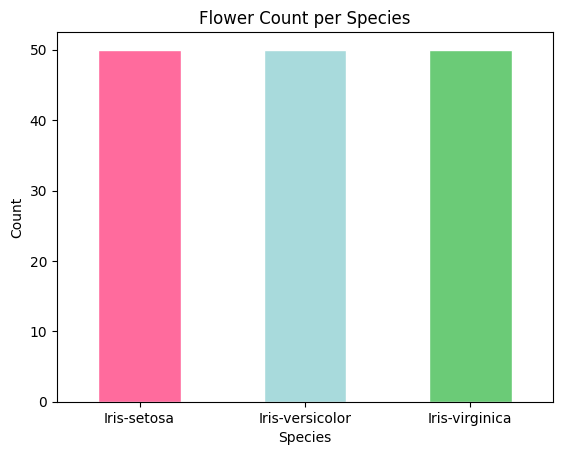

In [8]:
df['species'].value_counts().plot(kind='bar', color=['#FF6B9D','#A8DADC','#6BCB77'], edgecolor='white', width=0.5)
plt.title('Flower Count per Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Features Distribution

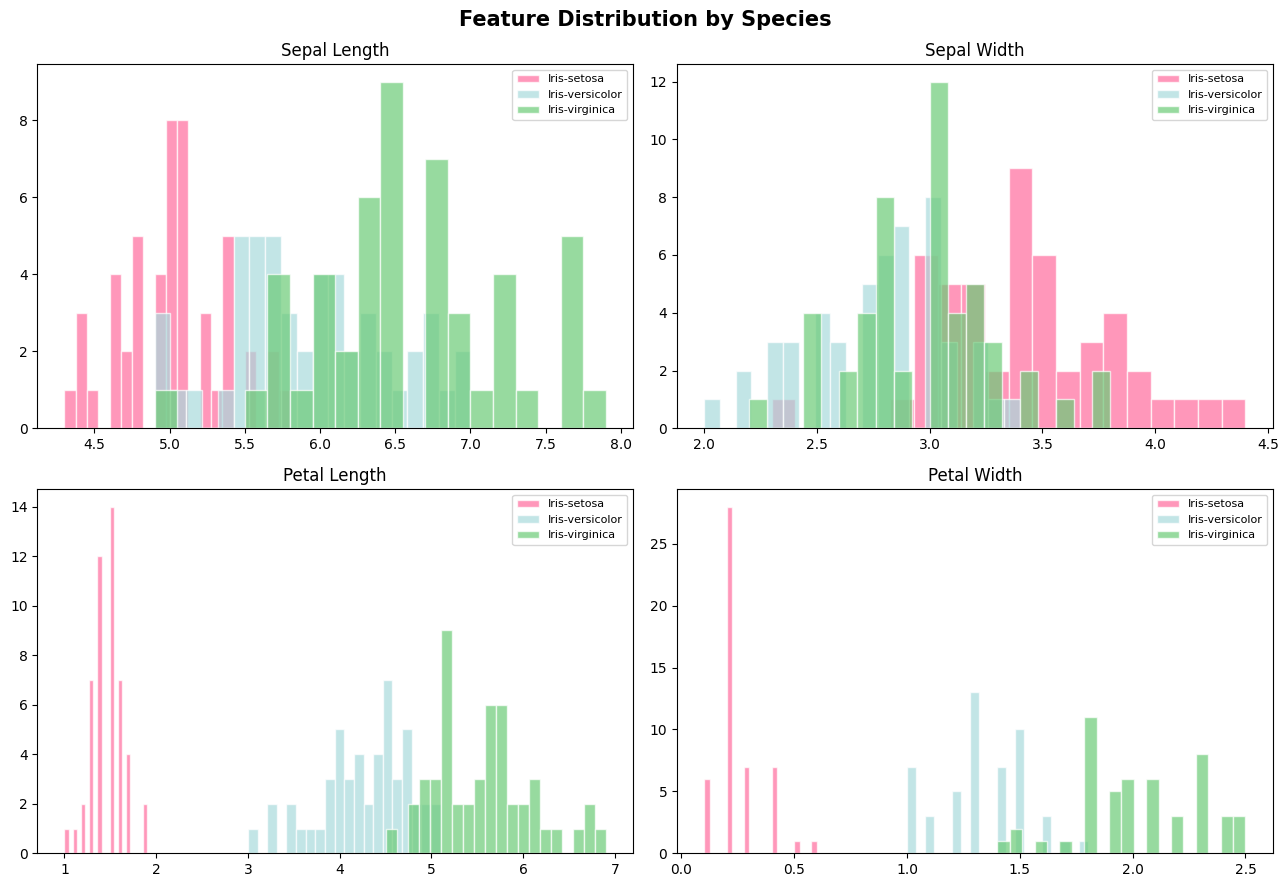

In [9]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors   = ['#FF6B9D', '#A8DADC', '#6BCB77']

fig, axes = plt.subplots(2, 2, figsize=(13, 9))

for ax, feature in zip(axes.flatten(), features):
    for color, (species, group) in zip(colors, df.groupby('species')):
        ax.hist(group[feature], bins=20, alpha=0.7, label=species, color=color, edgecolor='white')
    ax.set_title(feature.replace('_', ' ').title())
    ax.legend(fontsize=8)

plt.suptitle('Feature Distribution by Species', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

## Pair PLots of all Different Features

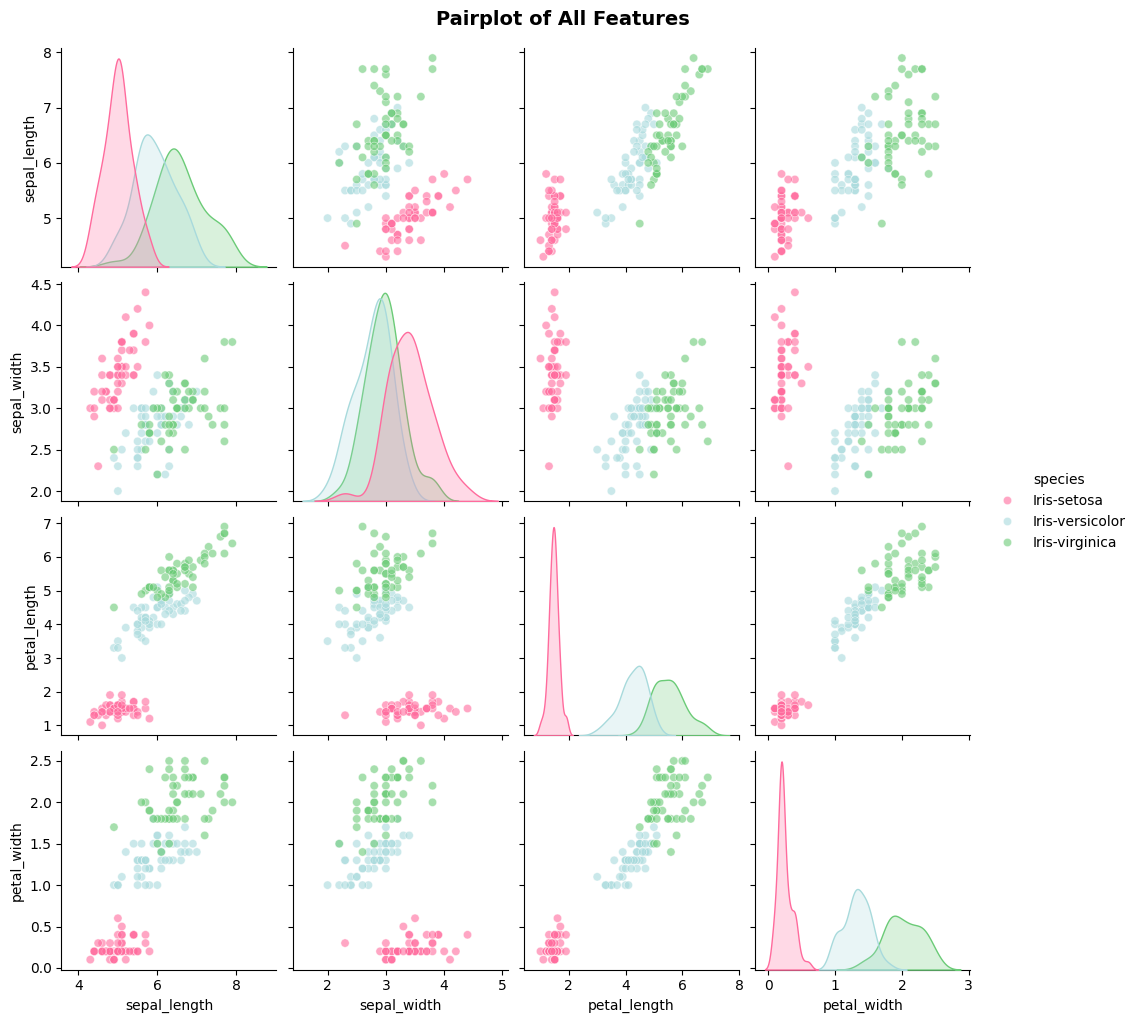

In [10]:
sns.pairplot(df, hue='species', palette=['#FF6B9D','#A8DADC','#6BCB77'],
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of All Features', y=1.02, fontsize=14, fontweight='bold')
plt.show()

## HeatMap

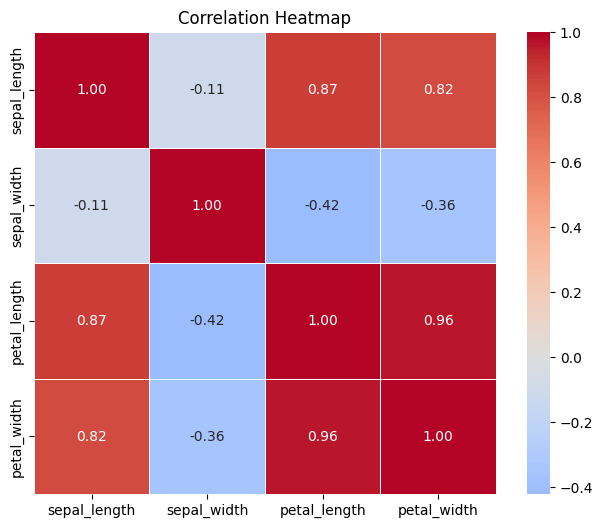

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, fmt='.2f',
            cmap='coolwarm', center=0, linewidths=0.5, square=True)
plt.title('Correlation Heatmap')
plt.show()

## Scatter Plot

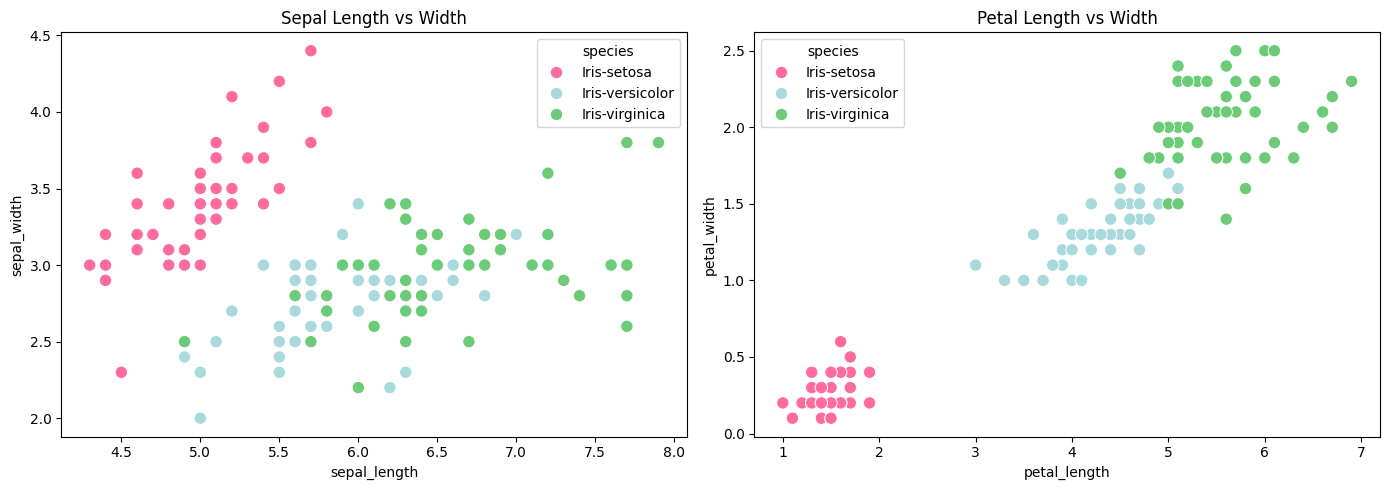

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=df, x='sepal_length', y='sepal_width',  hue='species', palette=['#FF6B9D','#A8DADC','#6BCB77'], s=80, ax=axes[0])
axes[0].set_title('Sepal Length vs Width')

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette=['#FF6B9D','#A8DADC','#6BCB77'], s=80, ax=axes[1])
axes[1].set_title('Petal Length vs Width')

plt.tight_layout()
plt.show()

## BoxPLot

/tmp/ipython-input-1753549555.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette=['#FF6B9D','#A8DADC','#6BCB77'], ax=ax)
/tmp/ipython-input-1753549555.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette=['#FF6B9D','#A8DADC','#6BCB77'], ax=ax)
/tmp/ipython-input-1753549555.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette=['#FF6B9D','#A8DADC','#6BCB77'], ax=ax)
/tmp/ipython-input-1753549555.py:4: FutureWarning: 

Passi

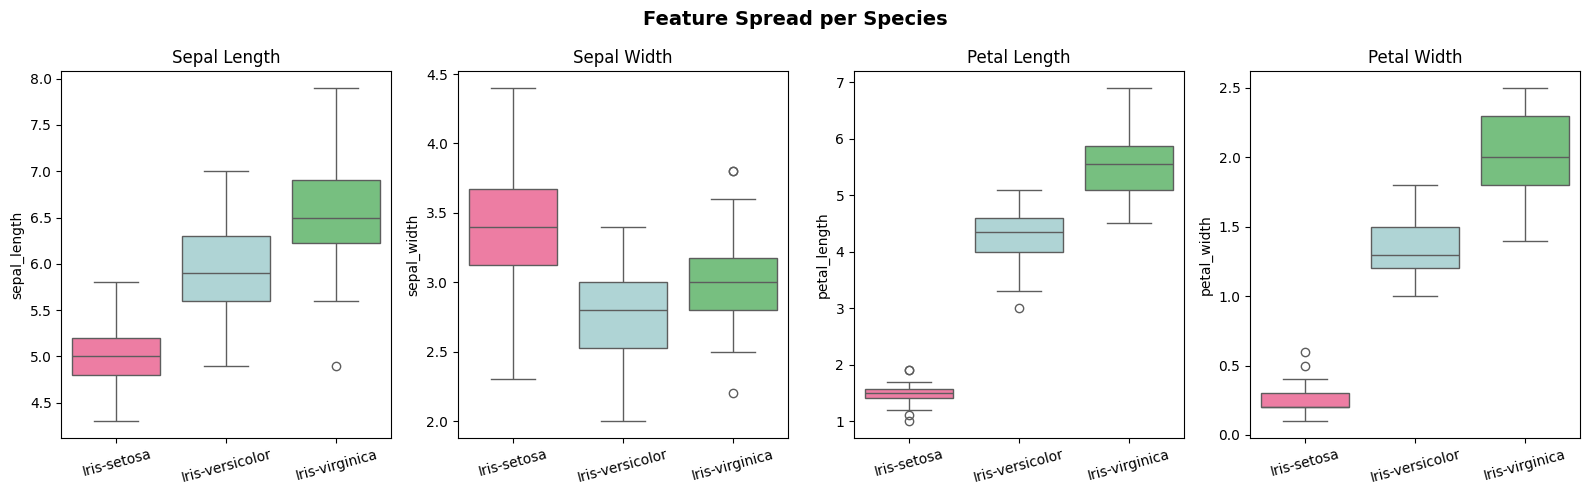

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax, feature in zip(axes, features):
    sns.boxplot(data=df, x='species', y=feature, palette=['#FF6B9D','#A8DADC','#6BCB77'], ax=ax)
    ax.set_title(feature.replace('_', ' ').title())
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=15)

plt.suptitle('Feature Spread per Species', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##  **Preprocess**

In [14]:
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

X = df[features]
y = df['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler      = StandardScaler()
X_train_sc  = scaler.fit_transform(X_train)
X_test_sc   = scaler.transform(X_test)

##  **Train Models**

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc, y_train)
knn_pred = knn.predict(X_test_sc)

In [16]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

##  **Evaluate Models**

In [18]:
results = pd.DataFrame({
    'Model'    : ['KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy' : [
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, rf_pred)
    ]
}).set_index('Model').round(4)

results

,Accuracy
Model,
KNN,1.0
Decision Tree,1.0
Random Forest,1.0


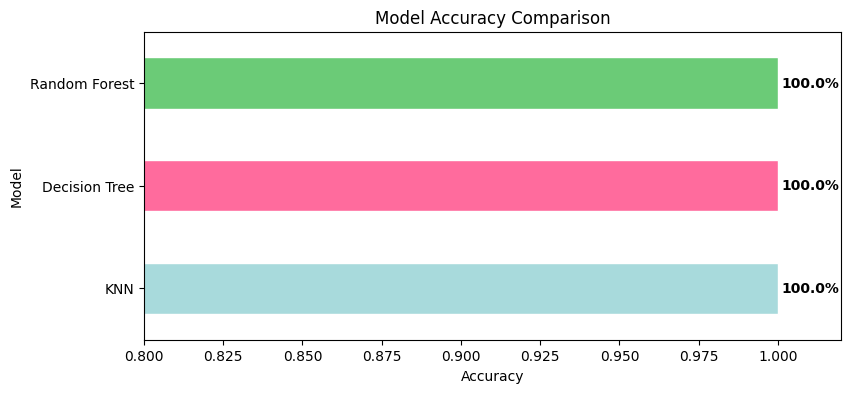

In [19]:
results['Accuracy'].sort_values().plot(
    kind='barh', color=['#A8DADC','#FF6B9D','#6BCB77'], edgecolor='white', figsize=(9, 4)
)
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.xlim(0.8, 1.02)

for i, v in enumerate(results['Accuracy'].sort_values()):
    plt.text(v + 0.001, i, f'{v*100:.1f}%', va='center', fontweight='bold')

plt.show()

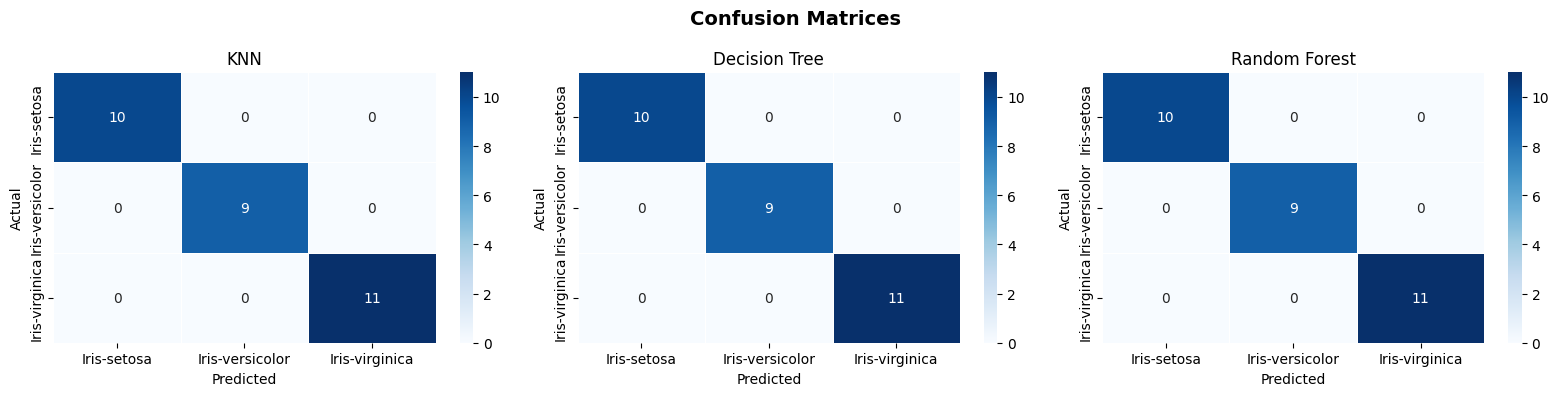

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
labels = le.classes_

for ax, pred, title in zip(axes,
    [knn_pred, dt_pred, rf_pred],
    ['KNN', 'Decision Tree', 'Random Forest']):

    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels, ax=ax, linewidths=0.5)
    ax.set_title(f'{title}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.suptitle('Confusion Matrices', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [21]:
print(classification_report(y_test, rf_pred, target_names=le.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



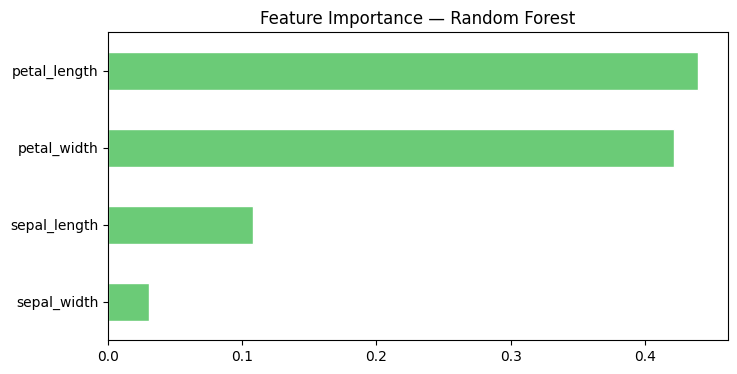

In [22]:
pd.Series(rf.feature_importances_, index=features).sort_values().plot(
    kind='barh', color='#6BCB77', edgecolor='white', figsize=(8, 4)
)
plt.title('Feature Importance — Random Forest')
plt.show()

## 🔮 **Predict New Flower**

In [23]:
new_flower = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=features)

prediction = rf.predict(new_flower)
species     = le.inverse_transform(prediction)[0]

print(f'Predicted Species → {species}')

Predicted Species → Iris-setosa


---
##  **Summary..............**

| Step | Done |
|------|------|
| Load & Explore | ✅ |
| 6 Visualizations | ✅ |
| 3 Models Trained | ✅ |
| Confusion Matrix | ✅ |
| Feature Importance | ✅ |
| New Prediction | ✅ |

>  **Random Forest** gives the best accuracy on this dataset.....